In [2]:
# Dependencies
import pandas as pd

In [3]:
# Load CSV as Dataframe
wine_data = "Data/winemag-data-130k-v2.csv"
wine_df = pd.read_csv(wine_data, encoding = 'latin-1')

In [22]:
# List off words to look for
fruit_list = ['cherry','plum','apple','blackberry','lemon',
    'raspberry','peach','pear','currant','lime',
    'orange','strawberry','melon','grapefruit',
    'pineapple','apricot','cranberry','blueberry','tangerine',
    'prune','nectarine','tomato','mango','pomegranate',
    'boysenberry','coconut','banana','lychee','papaya',
    'honeydew','gooseberry','kiwi']

# Build dictionary with words as keys and empty sub-dictionaries as values
country_fruits = {}

# Add empty row for fruit totals
country_fruits['Total'] = dict.fromkeys(fruit_list + ['Wine Total','Fruit Total'],0)

# For each wine, check description for fruit words
for entry in wine_df.index:
    country = wine_df['country'][entry]
    if not pd.isna(country):
        # Add country if needed
        if country not in country_fruits.keys():
            country_fruits[country] = dict.fromkeys(fruit_list + ['Wine Total','Fruit Total'],0)

        # Count the wine itself
        country_fruits[country]['Wine Total'] += 1
        country_fruits['Total']['Wine Total'] += 1

        # For each instance of a fruit word, increment the revelant counters
        for fruit in fruit_list:
            if fruit in wine_df['description'][entry]:
                country_fruits[country][fruit] += 1
                country_fruits[country]['Fruit Total'] += 1
                country_fruits['Total'][fruit] += 1
                country_fruits['Total']['Fruit Total'] += 1

In [57]:
# Flip resulting dataframe to make narrower
country_fruits_df = pd.DataFrame(country_fruits).transpose()

# Filter countries with inadequate sample size
sample_min = 100
country_fruits_df = country_fruits_df.loc[country_fruits_df['Wine Total'] >= sample_min, :]

# Calculate fruit ratios
country_fruits_df['Fruitiness'] = ((country_fruits_df['Fruit Total'] / country_fruits_df['Wine Total']) * 100)

# Sort and format
sort_by = 'Fruitiness'
country_fruits_df = country_fruits_df.sort_values(by = sort_by, ascending = False)
country_fruits_df['Fruitiness %'] = country_fruits_df['Fruitiness'].map("{:.1f}%".format)

# Move the totals to the bottom
country_fruits_df = pd.concat([country_fruits_df.drop('Total'),country_fruits_df.loc['Total'].to_frame().T])

# Show the dataframe
country_fruits_df

,cherry,plum,apple,blackberry,lemon,raspberry,peach,pear,currant,lime,...,banana,lychee,papaya,honeydew,gooseberry,kiwi,Wine Total,Fruit Total,Fruitiness,Fruitiness %
Israel,282,117,53,101,45,95,52,41,31,26,...,1,4,1,10,5,1,505,1252,247.920792,247.9%
Bulgaria,78,35,27,23,36,30,12,1,3,7,...,1,1,1,2,1,1,141,333,236.170213,236.2%
Hungary,30,18,39,4,36,10,43,25,0,8,...,0,3,1,2,1,0,146,341,233.561644,233.6%
Germany,209,192,546,17,625,32,764,186,5,645,...,1,15,2,33,24,2,2165,4969,229.515012,229.5%
Romania,49,28,29,5,25,8,24,10,0,6,...,3,2,1,3,2,0,120,246,205.0,205.0%
South Africa,283,354,319,120,99,121,169,129,95,129,...,17,7,2,38,62,9,1401,2656,189.578872,189.6%
Spain,1029,2106,954,935,400,713,459,163,227,362,...,109,56,138,26,21,27,6645,10731,161.489842,161.5%
Canada,38,26,51,11,30,11,24,23,1,21,...,0,8,7,0,4,0,257,400,155.642023,155.6%
Italy,7973,2341,2371,2036,1045,2087,2288,1738,748,348,...,138,32,49,178,21,127,19540,30122,154.155578,154.2%
Argentina,514,1140,309,794,171,332,159,94,134,110,...,84,145,51,17,3,3,3800,5582,146.894737,146.9%


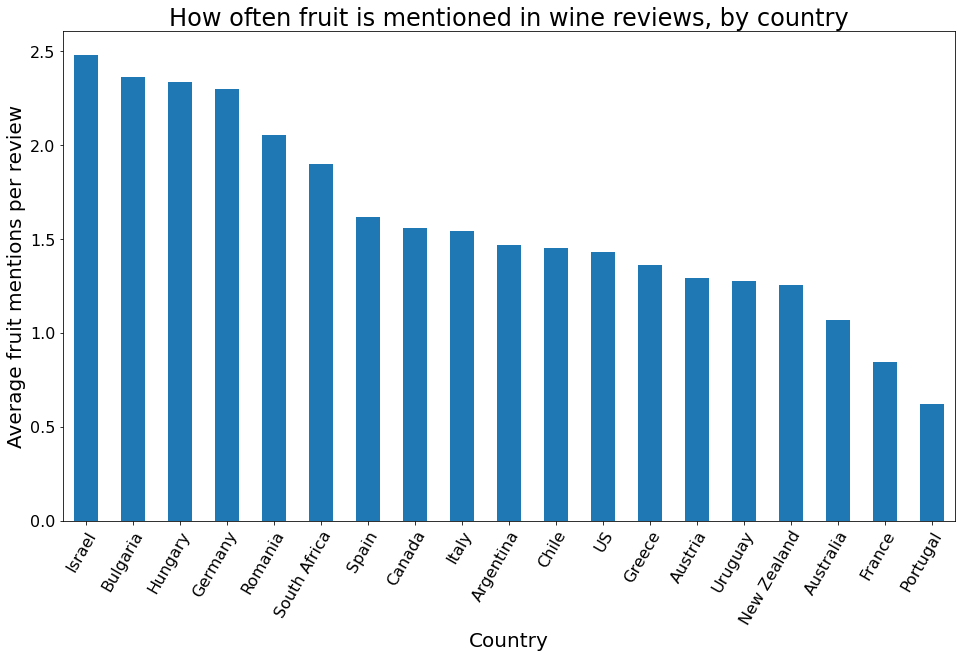

In [124]:
# Based on the number of times specific fruits are mentioned in reviews, what countries are known for proportionally fruitier wine?

# Copy the dataframe, without the totals row
bar_df = pd.DataFrame(country_fruits_df.iloc[:country_fruits_df.shape[0] - 1,:])

# Make the fruitiness numbers into ratios rather than percents
bar_df['Fruitiness'] = bar_df['Fruitiness'] / 100

# Build the bar graph
ax = bar_df.plot.bar(y = 'Fruitiness', legend = False, figsize = (16,9), fontsize = 16)
ax.set_title('How often fruit is mentioned in wine reviews, by country', fontsize = 24)
ax.set_xlabel('Country', fontsize = 20)
ax.set_ylabel('Average fruit mentions per review', fontsize = 20)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 60, ha = 'right', rotation_mode = 'anchor')

# Save it
ax.figure.savefig('Output/fruit_by_the_country.png')

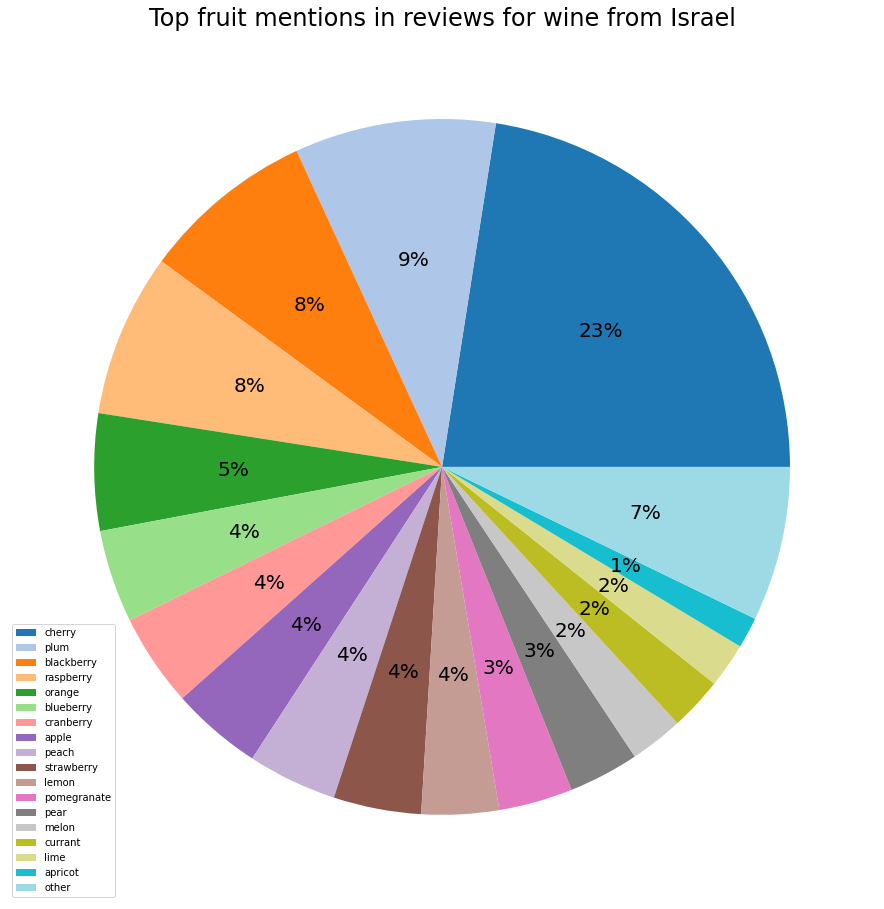

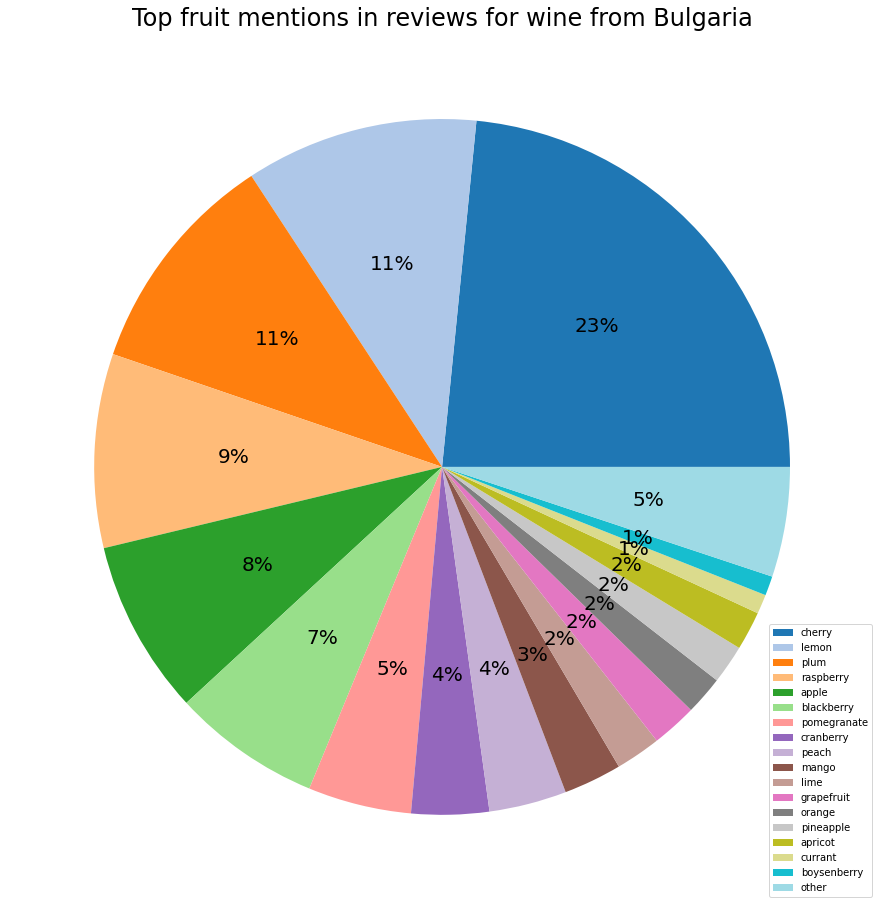

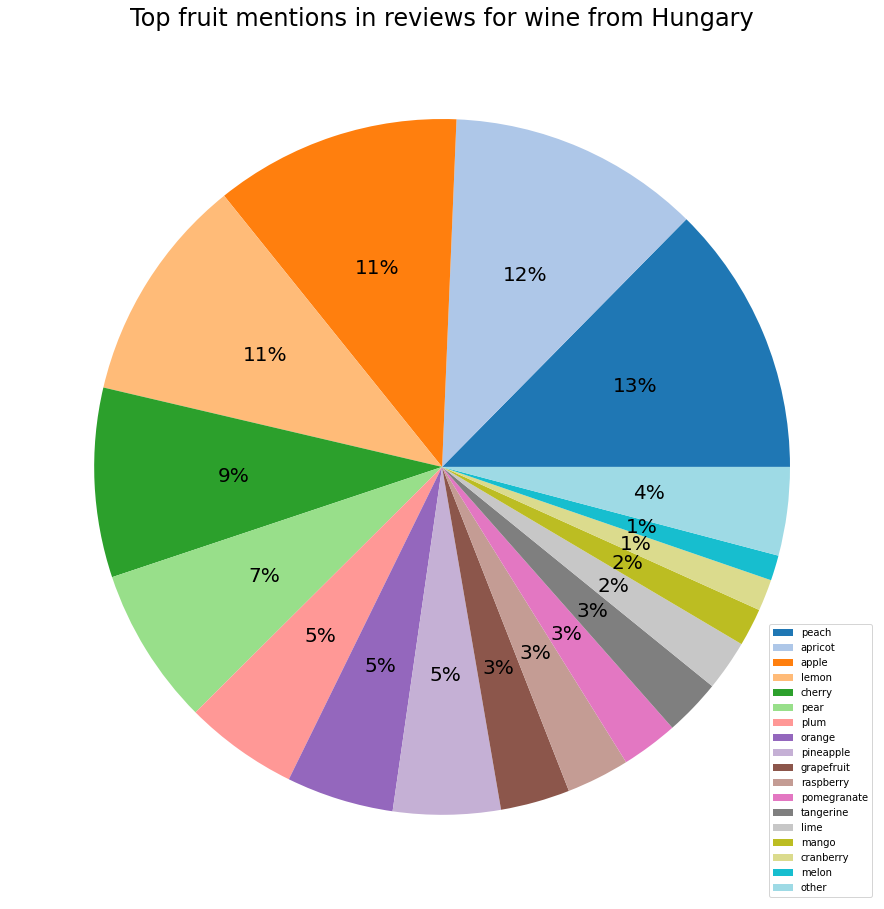

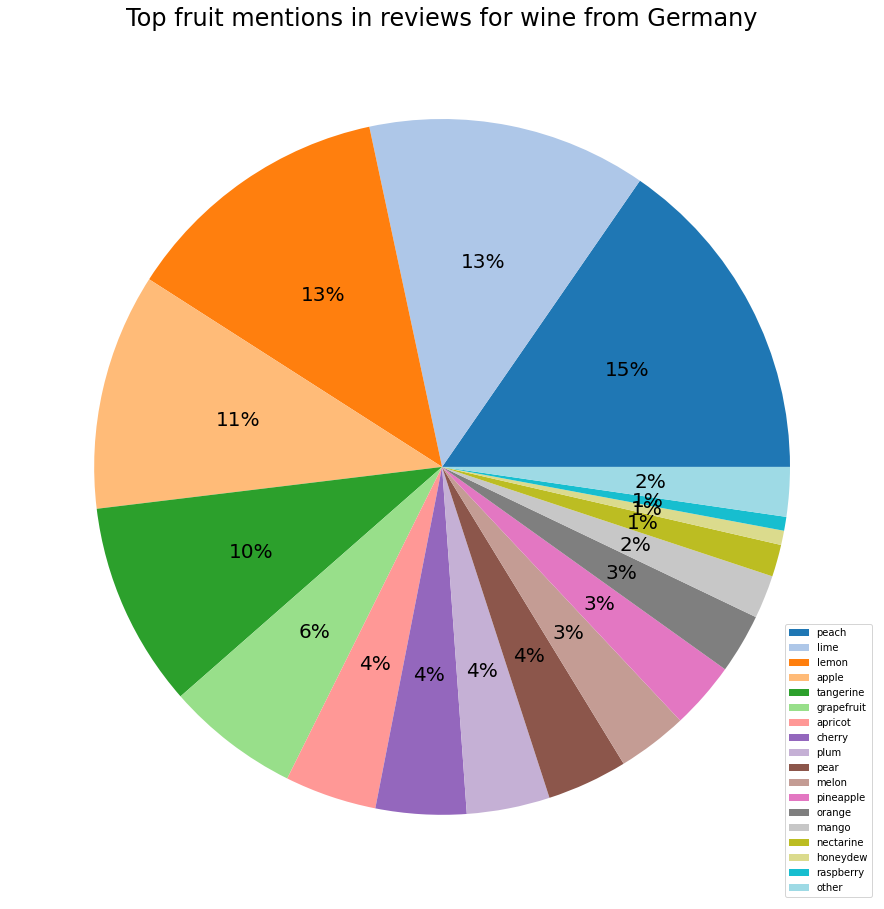

In [245]:
# For each of the four countries with the fruitiest wine, as determined by the previous question, what fruits are mentioned most frequently?

# Make another copy of the dataframe, this time with just the top 4 countries and only columns counting specific fruits, and flip the whole thing to prepare it for baking into pie charts
pies_df = pd.DataFrame(country_fruits_df.iloc[0:4,0:country_fruits_df.shape[1] - 4]).T

# Define after which number of fruits the remainder should be lumped into 'other'
other = 17

# Make pie charts for every country
for country_name in pies_df:
    
    # Get the column position of the current country
    position = pies_df.columns.get_loc(country_name)

    # Make a dataframe for just the current country
    pie_slice_df = pies_df.sort_values(by = country_name, ascending = False).iloc[:,position:position + 1]

    # Get the top {other} fruits for that country and flip it so 'other' can be added as a column
    top_fruits = pd.DataFrame(pie_slice_df.iloc[0:other,:]).T
    # Lump the rest into 'other'
    top_fruits['other'] = pie_slice_df.iloc[other:,:].sum()

    # Flip it back for pie chart-ification
    top_fruits = top_fruits.T
    ax = top_fruits.plot.pie(y = country_name, figsize = (16,16), autopct = '%1.0f%%', cmap = 'tab20', labels = None, fontsize = 20)
    ax.set_title(f'Top fruit mentions in reviews for wine from {country_name}', fontsize = 24)
    ax.set_ylabel(None)

    # Save the pie chart
    ax.figure.savefig(f'Output/{country_name}_top_fruits.png')
    